# Learning Objectives

Towards the end of this lesson, you should be able to:
- experiment with K-means and Hierarchical clustering techniques
- understand how silhouette works and program it in Python


## Load Libraries

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
from yellowbrick.cluster import silhouette_visualizer

# K-Means

### Load Dataset

In [2]:
# K-Means: K~4; Means~centroid
# random_state~everytime u run, the result might be diff slightly

# Read the banking dataset

df = pd.read_csv('banking.csv') 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Separate data into X and y

In [3]:
# Prepare X and y

X = df.drop('y', axis=1)
y = df['y']

### Dummifying X only

In [4]:
# dummification of variables
X = pd.get_dummies(X, drop_first=True)
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

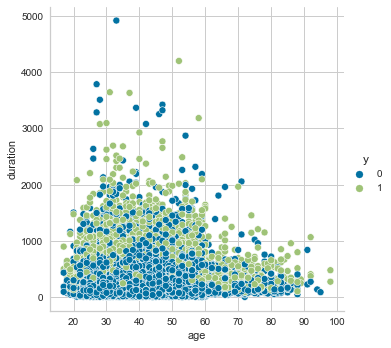

In [5]:
ax = sns.relplot(x="age", y="duration", hue="y", data=df)
# visual presentation of how things can be presented in a 2D manner

### Applying the k-Means approach

In [6]:
# the number of clusters here is 2
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(n_clusters=3, random_state=1)

In [7]:
# print the labels

# km.labels_.tolist()
pd.DataFrame(km.labels_)

,0
0,0
1,0
2,1
3,0
4,1
...,...
41183,0
41184,0
41185,0
41186,0


### Identify the k value

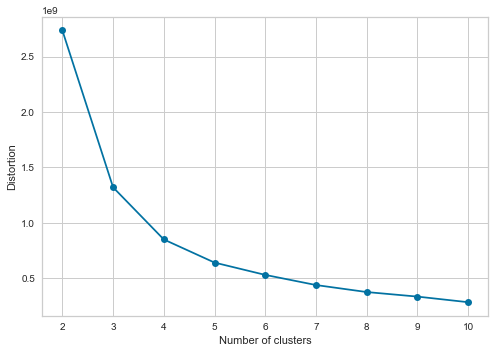

In [8]:
distortions = []
for i in range(2, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# elbow criterion: what's the best k number for the dataset
# what does it mean when the slope start to reduce?
# -> good turning point that we want
# -> the ratio between the data in the group
# -> get a balance (just nice), no distortion, the slope starting to reduce
# -> no need for further split

### Create a copy of df and merge the newly predicted labels back

In [9]:
df_new = df.copy()
df_new = df_new.drop("y", axis=1)
df_new['y']=km.labels_

In [10]:
km.labels_

array([7, 8, 6, ..., 8, 9, 8])

In [11]:
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,7
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,8
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,6
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,6


### Create plots to visualise the difference

<AxesSubplot:xlabel='age', ylabel='duration'>

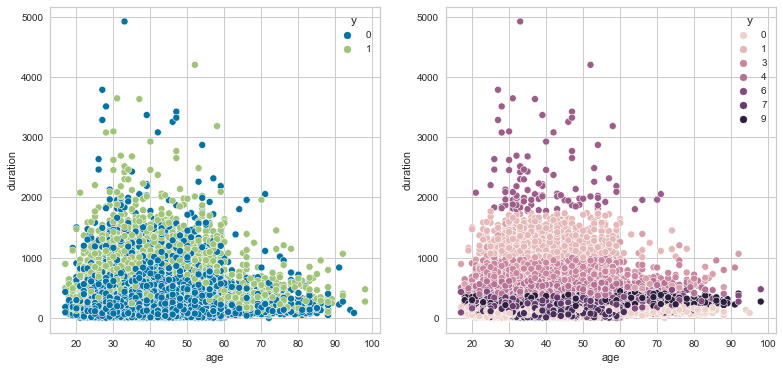

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x="age", y="duration", hue="y", data=df, ax=axes[0])
sns.scatterplot(x="age", y="duration", hue="y", data=df_new, ax=axes[1])

# Hierarchical Clustering

### Loading Dataset

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.




In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('Wholesale.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Normalization of dataset

There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together. We will, of course, use Hierarchical Clustering for this problem.

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

So, let’s first normalize the data and bring all the variables to the same scale:

In [15]:
# normalize the dataset so that we do not provide a way for the algorithm..
# to think that diff variables wouldhave diff weightage
# so we normalize everything to 0 and 1 and let the algorithm has no choice..
# but to thoroughly study every single variables before a decision is made
from sklearn.preprocessing import normalize

data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


### Dendrogram

A dendrogram is a tree-like diagram that records the sequences of merges or splits. Whenever we merge two clusters, a dendrogram will record the distance between these clusters and represent it in graph form. As shown in the dendogram below, there are 2 objects and the distance between them is 3.

<img src="sample_dendogram.png" style="height: 300px;" align=left> 

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. In the above example, since the red line intersects 2 vertical lines, we will have 2 clusters. One cluster will have a sample (1,2,4) and the other will have a sample (3,5). 

<img src="sample_dendo2.png" style="height: 300px;" align=left> 

### Hierarchical Clustering using Python


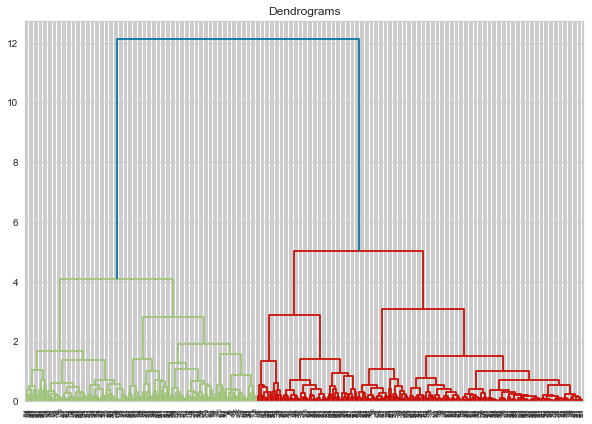

In [18]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7)) 
plt.title("Dendrograms")  

dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

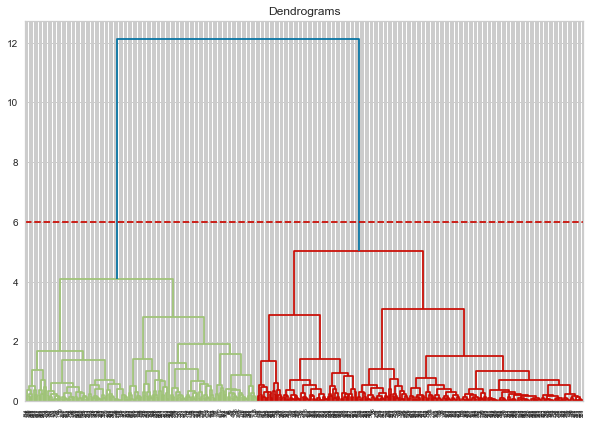

In [19]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

### Agglomerative Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:


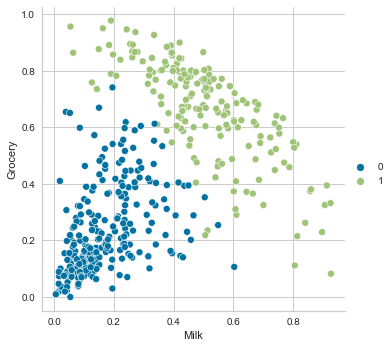

In [21]:
sns.relplot(x="Milk", y="Grocery", hue=cluster.labels_, data=data_scaled)

## Difference between k-means and Hierarchical Clustering

- Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).
- In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.
- K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram

# DBSCAN 

In [22]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.1, min_samples=10).fit(data_scaled)
clustering.labels_


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,  0,  0,
       -1, -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0,  1, -1,  0,
       -1,  0, -1,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,  1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  1, -1, -1,  0,  0, -1,  0,
       -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0,
       -1, -1, -1,  0,  1

# Tasks

Change the configuration with different min_samples and eps:

- min_samples = 5, eps = 0.1
- min_samples = 3, eps = 0.1
- min_samples = 5, eps = 0.5


# Silhouette Coefficient

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

- 1: clusters are well apart from each other and clearly distinguished.
- 0: clusters are indifferent, or we can say that the distance between clusters is not significant.
- -1: clusters are assigned in the wrong way.


$S(i) = \frac{b(i)-a(i)}{max(a(i),b(i))}$

- a(i) = the average distance between a point i to its neighbouring points within a cluster.
- b(i) = the average distance from point i to all points in the nearest cluster.

Therefore, every point in the dataset has a silhouette coefficient. Subsequently, for every k in k-means, there is a silhouette for it.

### Generate a Toy Dataset

I am using make_blobs to randomly generate data points

In [23]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=12)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1]))
df

,x,y
0,-10.064160,5.336130
1,-5.939345,0.293243
2,-4.282810,0.033378
3,-3.968270,0.646273
4,-5.580912,5.119659
...,...,...
95,-7.170647,4.874246
96,-1.692013,0.048707
97,-5.251409,0.278910
98,-6.360683,5.023713


### Generate the Scatterplot

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

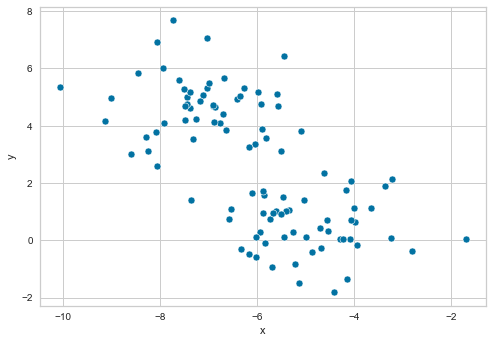

In [24]:
sns.scatterplot(df['x'], df['y'])

### Perform K-Means onto the Dataset

Change the n_clusters accordingly. I start with 2 here...

In [25]:
import numpy as np

In [27]:
KMean = KMeans(n_clusters=2, random_state=12)
KMean.fit(df)
label=KMean.fit_predict(df)

df['label']=label


### Check the Scatterplot after K-Means

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

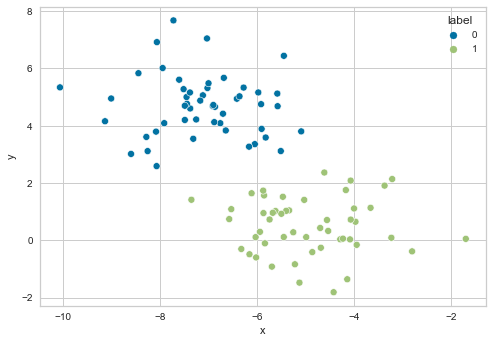

In [28]:
sns.scatterplot(df['x'], df['y'], hue=df['label'])

### Silhouette Score when k=2

Take note that you should change K values accordingly

In [29]:
print('Silhouette Score (n=2) = ', silhouette_score(df, label))

Silhouette Score (n=2) =  0.6236149469426021


### Visualizing the Silhouette Coefficient

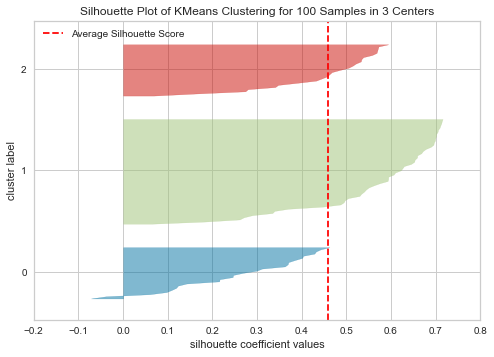

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 100 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=12))

In [30]:
silhouette_visualizer(KMeans(3, random_state=12), df, colors='yellowbrick')

# New Task

Change the K value and also the random_state.

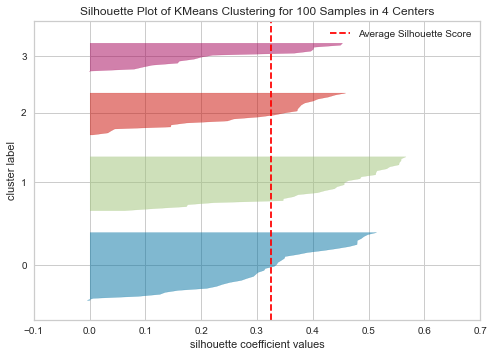

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 100 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=12))

In [31]:
# k = 4
silhouette_visualizer(KMeans(4, random_state=12), df, colors='yellowbrick')

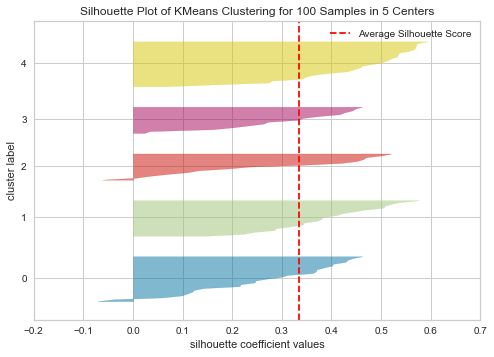

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 100 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=12))

In [32]:
# k =5
silhouette_visualizer(KMeans(5, random_state=12), df, colors='yellowbrick')